In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

# Step 2: Load the data
# Replace 'customer_data.csv' with the path to your CSV file
data = pd.read_csv('cust.csv')


In [7]:
data.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:

# Step 3: Preprocess the data
# Assuming the data has columns 'CustomerID' and various features
# Drop 'CustomerID' if it's not needed for clustering
features = data.drop(columns=['CustomerID','Gender'])



In [9]:

# Handle missing values (if any)
features.fillna(features.mean(), inplace=True)


In [10]:

# Normalize the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)



In [11]:

# Step 4: Implement K-means clustering
# Determine the optimal number of clusters using the Elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    sse.append(kmeans.inertia_)


/Users/anuragtiwari/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/anuragtiwari/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/anuragtiwari/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/anuragtiwari/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of

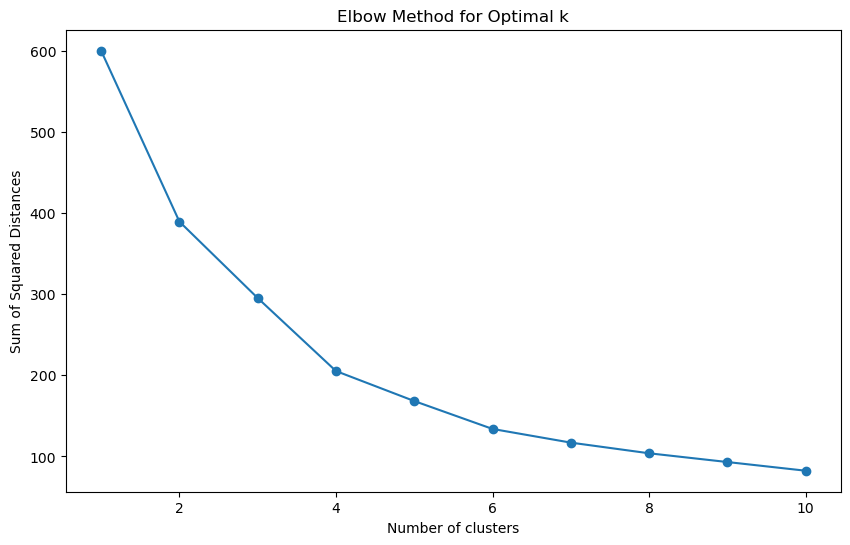

In [12]:

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Distances')
plt.show()


In [13]:

# Choose the optimal number of clusters (k) based on the Elbow curve
optimal_k = 4  # Example, choose based on the plot


In [14]:

# Apply K-means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(features_scaled)


/Users/anuragtiwari/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [15]:

# Step 5: Evaluate the clusters
silhouette_avg = silhouette_score(features_scaled, clusters)
print(f'Silhouette Score: {silhouette_avg}')


Silhouette Score: 0.4039582785148566


In [17]:

# Step 6: Visualize the clusters
# Add cluster labels to the original data
data['Cluster'] = clusters



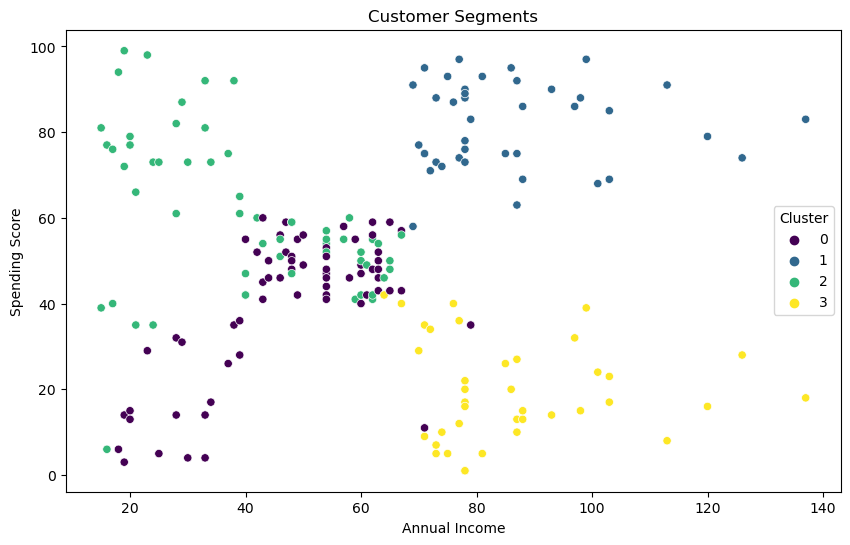

In [20]:
# Plot the clusters with actual feature names
plt.figure(figsize=(10, 6))

# Replace 'AnnualIncome' and 'SpendingScore' with your actual feature names
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=data, palette='viridis')
plt.title('Customer Segments')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()
